Import Libraries

In [1]:
import geopandas as gpd
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
import seaborn as sns
from textwrap import wrap
%matplotlib inline

Import Data

In [2]:
regions = gpd.read_file('./Data/nuts/NUTS_Level_1_(January_2018)_Boundaries.shp')
hesByRegion = pd.read_csv('./Data/Nature_VacHes_mod.csv', encoding = "ISO-8859-1")
hesByEthnicity = pd.read_csv("./Data/VaccHes_ByEtchinicty_combined.csv")
ipsosData = pd.read_csv('./Data/CombinedData.csv')

HESITANCY IN UK REGIONS, MAP PLOT

In [3]:
listOfRegions = regions['nuts118nm']

def getCountryInfo(countryID):
    return hesByRegion[hesByRegion["Country"]==countryID]

ukData_fullDS = getCountryInfo(18)
ukData = ukData_fullDS[['UK_region', 'Vaccine']]
ukData = ukData.astype(int)

def getRegionInfo(regionID):
    return ukData[ukData["UK_region"]==regionID]

def getRegionName(regionID):
    return listOfRegions[regionID]

def getMeanAgreement(regionID):
    regData = getRegionInfo(regionID)
    return np.sum(regData["Vaccine"]>3) / len(regData["Vaccine"]) * 100

#Get mean agreement per UK region
regionsData = pd.DataFrame()
selectedRegions = pd.unique(ukData["UK_region"])
selectedRegions = selectedRegions.astype(int)

for regionID in selectedRegions:
    regionsData = regionsData.append({
        'Vaccine Acceptancy': getMeanAgreement(regionID),
        'Region ID': regionID,
        'Region name': getRegionName(regionID-1)
    }, ignore_index=True)

regionsData = regionsData.sort_values(by="Region ID", ignore_index=True, ascending=True)

In [4]:
regionsData

,Region ID,Region name,Vaccine Acceptancy
0,1.0,North East (England),75.409836
1,2.0,North West (England),75.000000
2,3.0,Yorkshire and The Humber,70.000000
3,4.0,East Midlands (England),74.489796
4,5.0,West Midlands (England),69.565217
5,6.0,East of England,76.470588
6,7.0,London,77.358491
7,8.0,South East (England),69.354839
8,9.0,South West (England),73.770492
9,10.0,Wales,70.833333


Plot

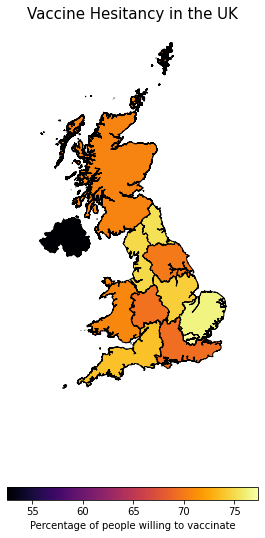

In [5]:

plot2 = pd.concat([regionsData, regions], axis = 1)
plot2=GeoDataFrame(plot2)

ax = plot2.plot(figsize=(15, 10), 
                column='Vaccine Acceptancy', 
                edgecolor='black', 
                legend = True, 
                cmap='inferno',
                legend_kwds={'shrink': 0.3, 
                             'label': "Percentage of people willing to vaccinate", 
                             'orientation': "horizontal"})           
#add title to the map
ax.set_title('Vaccine Hesitancy in the UK', fontdict= {'fontsize':15})
#remove axes
ax.set_axis_off()



HESITANCY OVER TIME ANALYSIS

In [4]:
ipsosData.head()

,Country,August,October,December
0,Australia,88,79,75
1,Brazil,88,81,78
2,Canada,76,76,71
3,China,97,85,80
4,France,59,54,40


August

(30.0, 100.0)

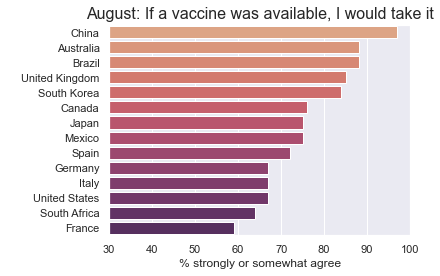

In [5]:
month='August'
ipsosData = ipsosData.sort_values(by=month, ascending=False)
sns.set_theme(font="Arial")
bar = sns.barplot(data=ipsosData, y="Country", x= month, palette='flare')
month_in_string = "{}: If a vaccine was available, I would take it".format(month)
plt.title(month_in_string, fontsize = 16)
bar.set(xlabel= '% strongly or somewhat agree', ylabel=' ') 

plt.tight_layout()
plt.xlim([30,100])


October

(30.0, 100.0)

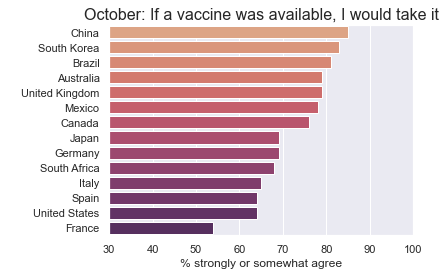

In [6]:
month='October'
ipsosData = ipsosData.sort_values(by=month, ascending=False)
sns.set_theme(font="Arial")
bar = sns.barplot(data=ipsosData, y="Country", x= month, palette='flare')
month_in_string = "{}: If a vaccine was available, I would take it".format(month)
plt.title(month_in_string, fontsize = 16)
bar.set(xlabel= '% strongly or somewhat agree', ylabel=' ') 

plt.tight_layout()
plt.xlim([30,100])

December

(30.0, 100.0)

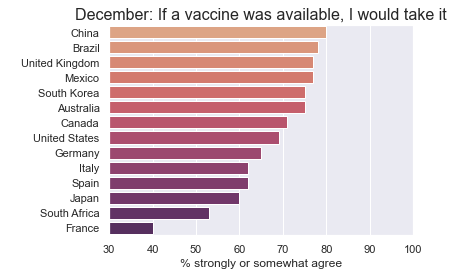

In [7]:
month='December'
ipsosData = ipsosData.sort_values(by=month, ascending=False)
sns.set_theme(font="Arial")
bar = sns.barplot(data=ipsosData, y="Country", x= month, palette='flare')
month_in_string = "{}: If a vaccine was available, I would take it".format(month)
plt.title(month_in_string, fontsize = 16)
bar.set(xlabel= '% strongly or somewhat agree', ylabel=' ') 

plt.tight_layout()
plt.xlim([30,100])


IPSOS UK data

In [8]:
def getCountryInfo(countryID):
    return ipsosData[ipsosData["Country"]==countryID]

data_in_UK = getCountryInfo('United Kingdom')
data_in_UK

,Country,August,October,December
12,United Kingdom,85,79,77


Append Global Average 

In [9]:
au_mean = np.sum(ipsosData["August"]) / len(ipsosData["August"])
oct_mean = np.sum(ipsosData["October"]) / len(ipsosData["October"])
dec_mean = np.sum(ipsosData["December"]) / len(ipsosData["December"])

long_data = pd.melt(ipsosData, id_vars="Country", value_vars=["August","October","December"], \
    var_name="Month", value_name="Percentage agreement")


for month,val in zip(["August","October","December"], [au_mean,oct_mean,dec_mean]):
    long_data = long_data.append({
        'Country': "Global Average",
        'Percentage agreement': val,
        'Month': month
    }, ignore_index=True)


selectedRows = (long_data["Country"]=="United Kingdom") | (long_data["Country"] == "Global Average")
dataToPlot = long_data[selectedRows]

## Plot changes over time

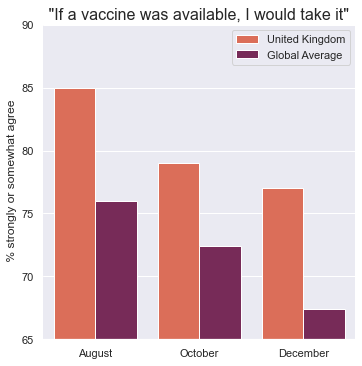

In [10]:
sns.set_theme(font="Arial")

g = sns.catplot(
    data=dataToPlot, kind="bar",
    x="Month", y="Percentage agreement", hue="Country",
    ci="sd", palette="rocket_r", legend=False
)
g.despine(left=True)
g.set_axis_labels("", " % strongly or somewhat agree")
#g.legend.set_title("")
plt.ylim([65,90])

plt.legend(loc='upper right')
plt.title(' "If a vaccine was available, I would take it" ', fontsize = 16)
plt.savefig('DecreaseOverMonths.svg', bbox_inches='tight')

HESITANCY BY ETHNICITY

In [11]:
hesByEthnicity = pd.DataFrame(data=hesByEthnicity)

In [12]:
hesByEthnicity.head()

,Ethnicity,Ethnicity_index,Population,Pop_percentage,VaccConfidency_percentage,1stDose,1stDose_perc,2ndDose,2ndDose_perc,CumulativeDoses_totalToDate,CumulativeDoses_perc
0,TotalPopulation,0,56075912.0,100.0,82.0,5792159.0,100.00,440425.0,100.00,6232584.0,100.00
1,Any other Asian background,1,1228861.0,2.2,86.1,87174.0,1.51,9365.0,2.13,168639.0,2.71
2,Indian,2,1412958.0,2.5,79.4,146075.0,2.52,12530.0,2.84,158605.0,2.54
3,Pakistani/Bangladeshi,3,1571712.0,2.8,57.7,61067.0,1.05,3911.0,0.89,64978.0,1.04
4,Black or Black British,4,1864890.0,3.3,28.2,88117.0,1.52,4336.0,0.98,92453.0,1.48


In [13]:
sel_data_Ethn = hesByEthnicity['Ethnicity_index']>0
sel_data_Ethn= hesByEthnicity[sel_data_Ethn]

In [14]:
sel_data_Ethn =sel_data_Ethn.sort_values(by="VaccConfidency_percentage", ascending=False)

(20.0, 90.0)

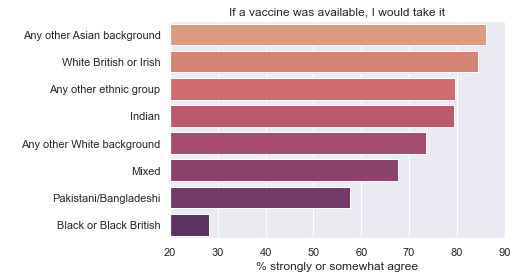

In [15]:
sns.set_style("whitegrid")
sns.set_theme(font="Arial")
plt.tight_layout()
plt.title('If a vaccine was available, I would take it')
plt.xlim([20,90])

bar = sns.barplot(data=sel_data_Ethn, y="Ethnicity", x="VaccConfidency_percentage", palette='flare')            
bar.set(xlabel='% strongly or somewhat agree', ylabel=' ')   
bar.set_xlim([20,90])
#plt.savefig('HesitancyByEthnicity_zero.svg', format='svg')

Vaccinations done by ethnicity

In [16]:
selectData_vax =sel_data_Ethn.sort_values(by="CumulativeDoses_perc", ascending=False)

[Text(0.5, 0, 'Vaccinated British (by ethcnicity, percentage of cumulative doses)'),
 Text(0, 0.5, ' ')]

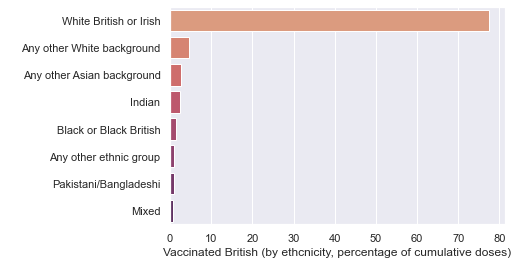

In [17]:
sns.set_style("whitegrid")
sns.set_theme(font="Arial")

plt.tight_layout()
#plt.title(plot_title)
#plt.xlim([0,80])

bar = sns.barplot(data=selectData_vax, y="Ethnicity", x="CumulativeDoses_perc", palette='flare')            
bar.set(xlabel='Vaccinated British (by ethcnicity, percentage of cumulative doses)', ylabel=' ') 

Vaccinated people by ethnicity per 100 people

In [18]:
per100people = (selectData_vax['CumulativeDoses_totalToDate']/selectData_vax['Population'])*100

In [19]:
selectData_vax['Vaccinated by ethnicity per 100 people'] = per100people



In [20]:
selectData_vax =selectData_vax.sort_values(by="Vaccinated by ethnicity per 100 people", ascending=False)

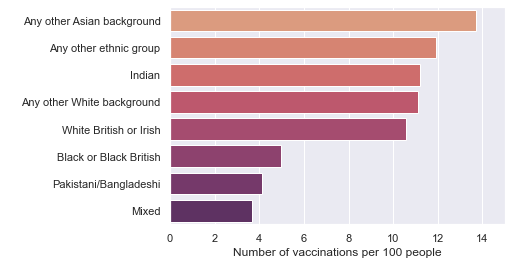

In [21]:
sns.set_theme(font="Arial")

plt.tight_layout()
#plt.title(plot_title)
plt.xlim([0,15])

bar = sns.barplot(data=selectData_vax, y="Ethnicity", x="Vaccinated by ethnicity per 100 people", palette='flare')            
bar.set(xlabel='Number of vaccinations per 100 people', ylabel=' ') 
#bar.set_xticklabels(bar.get_xmajorticklabels(), fontsize = 60)
plt.savefig('VaccinationByEthnicity.svg', format='svg')

  Plot correlation

Text(0.5, 1.0, 'Correlation between vaccine confidence and number of vaccinations')

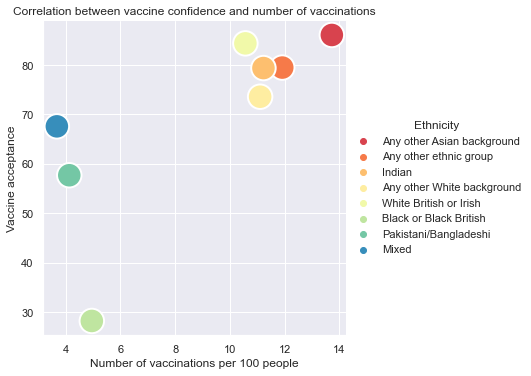

In [22]:
ax = sns.relplot(x="Vaccinated by ethnicity per 100 people", y="VaccConfidency_percentage", data=selectData_vax, hue ="Ethnicity", s=600, palette="Spectral")               
ax.set(ylabel='Vaccine acceptance', xlabel='Number of vaccinations per 100 people') 

plt.title('Correlation between vaccine confidence and number of vaccinations')
#plt.savefig('CorrelationHesVacs.svg', format='svg')

UK compared to other countries, Nature dataset

In [26]:
listOfCountries = (["Brazil", "Canada", "China", "Ecuador", "France", 
                   "Germany", "India", "Italy", "Mexico", "Nigeria", 
                   "Poland", "Russia", "South Africa", "South Korea", 
                   "Singapore", "Spain", "Sweden", "UK", "USA"])

In [27]:
def getCountryName(countryID):
    return listOfCountries[countryID]

def getMeanAgreement(countryID):
    countryData = getCountryInfo(countryID)
    return np.sum(countryData["Vaccine"]>3) / len(countryData["Vaccine"]) * 100

In [28]:
dataUK_nat=getCountryInfo(18)
getMeanAgreement(18)

71.6710182767624

In [29]:
customData_nat = pd.DataFrame()
selectedCountries_nat = pd.unique(hesByRegion["Country"])
for countryID in selectedCountries_nat:
    customData_nat = customData_nat.append({
        "Percentage of people who are very or somewhat likely to accept": getMeanAgreement(countryID),
        'CountryID': countryID,
        'Country name': getCountryName(countryID-1)
    }, ignore_index=True)

[Text(0.5, 0, 'Percentage of people who are likely to accept a Covid vaccine'),
 Text(0, 0.5, ' ')]

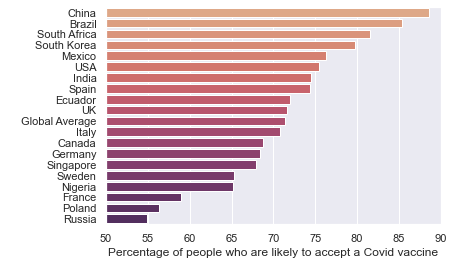

In [30]:
global_avg_nat = np.sum(customData_nat["Percentage of people who are very or somewhat likely to accept" \
                                ])/len(customData_nat["Percentage of people who are very or somewhat likely to accept"])
                                

customData_nat = customData_nat.append({
        'Percentage of people who are very or somewhat likely to accept': global_avg_nat,
        'CountryID': 20,
        'Country name': "Global Average"
    }, ignore_index=True)
plot_title = "How does Vaccine Hesitancy in the UK compare to other countries?"
sns.set_style("whitegrid")
sns.set_theme(font="Arial")

plt.tight_layout()
#plt.title(plot_title)
plt.xlim([50,90])

customData_nat = customData_nat.sort_values(by="Percentage of people \
who are very or somewhat likely to accept", ascending=False)
bar = sns.barplot(data=customData_nat, y="Country name", \
                  x="Percentage of people who are very or somewhat likely to accept", \
                  palette='flare')
bar.set(xlabel='Percentage of people who are likely to accept a Covid vaccine', ylabel=' ')